Usando os dados de weatherHistory.csv : 

 1 ) Limpar os dados (se e quando necessário) 
 2)  Verificar as correlações entre as diversas colunas de dados  
 3)  Analisar se existe uma relação entre Umidade e Temperatura ? 
 4)  Construir um modelo de predição que dado a Umidade calcule a temperatura 
    3.1 ) Testar os  modelos de regressão Simples e Polinomial 
    3.2)  Avaliar cada um dos modelos e determinar qual seria o recomendado (com justificativas) 
 
 5)  Implementar um(s) modelo(s) de regressão linear usando Umidade e Visibilidade como "features" e temperatura como valor a se predizer
 6)  Discutir e apresentar os resultados 

### 1.0 - importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # biblioteca testes 
from sklearn.linear_model import LinearRegression #biblioteca criação de modelo linear
from sklearn.preprocessing import StandardScaler # normalização
from sklearn.preprocessing import PolynomialFeatures # biblioteca de criação do modelo polinomial

### 2.0 - Buscando database

In [2]:
url = 'https://raw.githubusercontent.com/CharlesPrado23/Bootcamp_TurmaNoite/main/Aprendizado_Supervisionado/weatherHistory.csv'

### 3.0 - EDA

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df['Precip Type'].head()

0    rain
1    rain
2    rain
3    rain
4    rain
Name: Precip Type, dtype: object

In [9]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [10]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:
df_num = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)']]

In [12]:
df_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,15.8263,1015.13
1,9.355556,0.86,14.2646,15.8263,1015.63
2,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,0.83,14.1036,15.8263,1016.41
4,8.755556,0.83,11.0446,15.8263,1016.51


In [13]:
df_num_corr = df_num.corr()

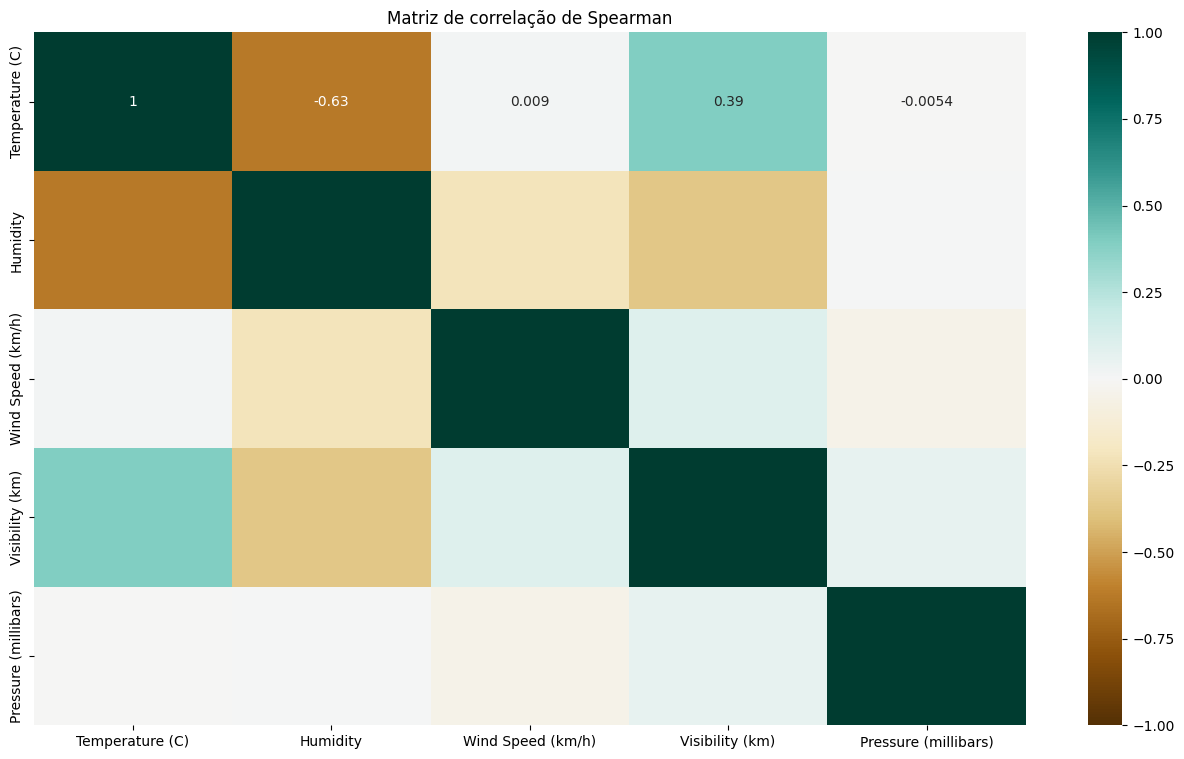

In [14]:
plt.figure(figsize = (16,9))

sns.heatmap(df_num_corr,
            vmin = -1, vmax= 1, annot = True, cmap = 'BrBG')

plt.title('Matriz de correlação de Spearman')

plt.show()

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

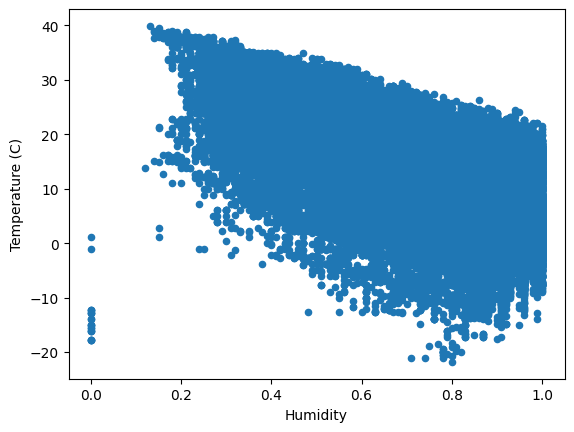

In [15]:
df_num.plot(kind='scatter',x='Humidity',y='Temperature (C)')

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

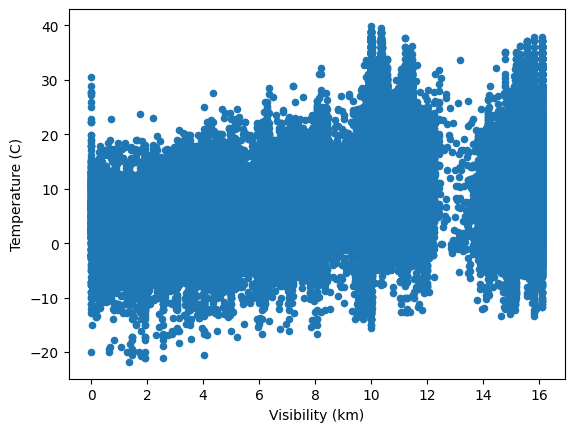

In [16]:
df_num.plot(kind='scatter',x='Visibility (km)',y='Temperature (C)')

### 4.0 - Criando modelo

4.1 - regressão linear

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_num[['Humidity']]
y = df_num[['Temperature (C)']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [20]:
X_train.tail()

,Humidity
9372,0.46
93553,0.90
50496,0.85
94735,0.82
83209,0.81


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
r2_training = lr.score(X_train,y_train)

In [25]:
r2_training # resuldado do treino

0.40127102336887166

In [26]:
yhat = lr.predict(X_test) # premedita resultados pro modelo para testar

In [27]:
yhat[0:5]

array([[10.53331301],
       [11.15237099],
       [24.15258861],
       [16.72389282],
       [10.53331301]])

In [28]:
r2_test = lr.score(X_test,y_test) # faz o r2 do teste

In [29]:
r2_test # resultado do teste, ou seja muito parecido com o treino.

0.39614778569757203

4.2 - modelo regressão múltipla

In [30]:
Xm = df_num[['Humidity','Visibility (km)']]
ym = df_num[['Temperature (C)']]

In [31]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.30, random_state=10)

In [32]:
from sklearn.preprocessing import StandardScaler # biblioteca para normalizar, tem que fazer a normalizaçãopara o conjunto de treino e teste separados

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(Xm_train) #normalização 

StandardScaler()

In [35]:
XmT_train = scaler.transform(Xm_train) # o xm normalizado

In [36]:
XmT_train

array([[-0.27871212,  1.32035374],
       [-0.02326309,  1.3741997 ],
       [ 0.43654517, -0.14117949],
       ...,
       [ 0.58981458, -1.27963696],
       [ 0.43654517, -0.35656334],
       [ 0.38545536,  1.3741997 ]])

In [37]:
lrm = LinearRegression()

In [38]:
lrm.fit(XmT_train,ym_train) # treinando o modelo e criando 

LinearRegression()

In [39]:
ymhat = lrm.predict(XmT_train) 

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(ym_train,ymhat) #1 forma

0.4301636575552641

In [42]:
r2m_training = lrm.score(XmT_train,ym_train) # 2ª forma

In [43]:
r2m_training

0.4301636575552641

In [44]:
XmT_test = scaler.transform(Xm_test) # aplica a normalização no conjunto de teste

In [45]:
r2m_test = lrm.score(XmT_test,y_test)

In [46]:
r2m_test # o resultado melhor um pouco quando acredcentou mais uma coluna (polinomial)

0.42683553757638504

4.3 Criando novo Df

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

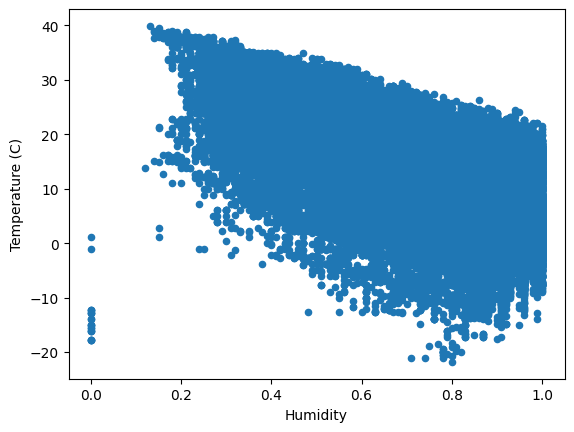

In [47]:
df_num.plot(kind='scatter',x='Humidity',y='Temperature (C)')

In [48]:
len(df_num['Humidity'].unique())

90

In [49]:
df_num_new = df_num.groupby('Humidity')['Temperature (C)'].mean()

In [50]:
df_num_new

Humidity
0.00   -13.560606
0.12    13.888889
0.13    39.905556
0.14    32.637500
0.15    25.514444
          ...    
0.96     5.595618
0.97    13.613889
0.98     5.327339
0.99     4.650046
1.00     4.502276
Name: Temperature (C), Length: 90, dtype: float64

In [51]:
df_num_new = pd.DataFrame(df_num_new).reset_index()
df_num_new

,Humidity,Temperature (C)
0,0.00,-13.560606
1,0.12,13.888889
2,0.13,39.905556
3,0.14,32.637500
4,0.15,25.514444
...,...,...
85,0.96,5.595618
86,0.97,13.613889
87,0.98,5.327339
88,0.99,4.650046


<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

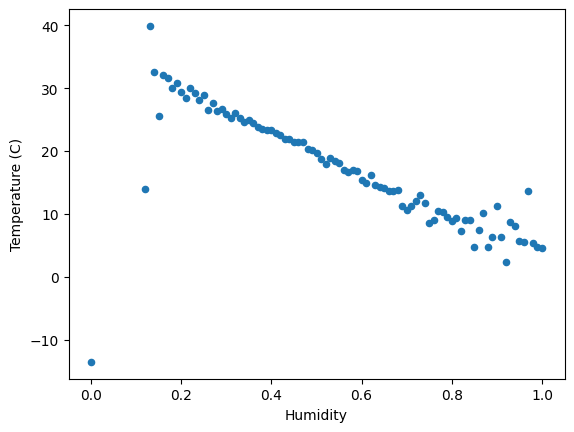

In [52]:
df_num_new.plot(kind='scatter',x='Humidity',y='Temperature (C)')

In [53]:
df_num_new.corr()

,Humidity,Temperature (C)
Humidity,1.00000,-0.78117
Temperature (C),-0.78117,1.00000


In [54]:
Xn = df_num_new[['Humidity']]
yn = df_num_new[['Temperature (C)']]

In [55]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.30, random_state=10)

In [56]:
lrn = LinearRegression()

In [57]:
lrn.fit(Xn,yn)

LinearRegression()

In [58]:
lrn.score(Xn,yn)

0.6102259333157127

In [59]:
ynhat = lrn.predict(Xn_test)

In [60]:
ynhat

array([[ 8.70895953],
       [22.15939499],
       [28.34659531],
       [19.73831661],
       [24.04245596],
       [25.3874995 ],
       [19.20029919],
       [10.8610292 ],
       [18.93129048],
       [23.50443854],
       [12.74409017],
       [12.20607275],
       [16.24120339],
       [13.01309888],
       [ 7.09490727],
       [18.12426435],
       [13.28210758],
       [17.04822951],
       [18.66228177],
       [15.70318597],
       [27.53956918],
       [10.05400307],
       [14.08913371],
       [16.5102121 ],
       [ 6.55688985],
       [28.61560402],
       [14.35814242]])

In [61]:
r2n_test = lrn.score(Xn_test,yn_test)

In [62]:
r2n_test

0.8831155171755198

4.4 - Polinomial

In [63]:
X = df_num[['Humidity']]
y = df_num[['Temperature (C)']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [65]:
from sklearn.preprocessing import PolynomialFeatures # transformação polinominal

In [66]:
poly = PolynomialFeatures(degree=3) #coloca o degree


In [67]:
poly.fit(X_train)

PolynomialFeatures(degree=3)

In [68]:
X_T_train = poly.transform(X_train)

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(X_T_train,y_train)

LinearRegression()

In [71]:
r2_poly_train = lr.score(X_T_train,y_train)

In [72]:
r2_poly_train

0.408819507421861

In [73]:
X_T_test = poly.transform(X_test)

In [74]:
y_hat = lr.predict(X_T_test)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y_hat)

0.4041066634168873

### Exemplo 2

In [77]:
from sklearn.datasets import load_breast_cancer

In [94]:
url2 ='C:/Users/laiss/OneDrive/Arquivos/analista de dados/aprendizado supervisionado/car data.csv' # coloquei outro csv, pois o que estava não estava funcionandp

In [95]:
df2 = pd.read_csv(url2)

In [96]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [98]:
from ydata_profiling import ProfileReport 

In [99]:
type(df2)

pandas.core.frame.DataFrame

In [100]:
report_df2 = ProfileReport(df2)

In [101]:
report_df2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [104]:
df2['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [105]:
df2.replace({'Petrol': 1, 'Diesel': 2, 'CNG': 3}, inplace= True)

In [106]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,2,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,2,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,1,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,1,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,2,Dealer,Manual,0


In [107]:
df2['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [109]:
df2.replace({'Dealer': 1, 'Individual': 2}, inplace= True)

In [110]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,Manual,0
1,sx4,2013,4.75,9.54,43000,2,1,Manual,0
2,ciaz,2017,7.25,9.85,6900,1,1,Manual,0
3,wagon r,2011,2.85,4.15,5200,1,1,Manual,0
4,swift,2014,4.60,6.87,42450,2,1,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,Manual,0
297,brio,2015,4.00,5.90,60000,1,1,Manual,0
298,city,2009,3.35,11.00,87934,1,1,Manual,0
299,city,2017,11.50,12.50,9000,2,1,Manual,0


In [111]:
df2['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [112]:
df2.replace({'Manual': 1, 'Automatic': 2}, inplace= True)

In [113]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,2,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,2,1,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,2,1,1,0
297,brio,2015,4.00,5.90,60000,1,1,1,0
298,city,2009,3.35,11.00,87934,1,1,1,0
299,city,2017,11.50,12.50,9000,2,1,1,0


In [114]:
df2['Age'] = 2023 - df2['Year']

In [115]:
df2.drop(columns= 'Year', inplace= True)

In [116]:
df2

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,1,1,1,0,9
1,sx4,4.75,9.54,43000,2,1,1,0,10
2,ciaz,7.25,9.85,6900,1,1,1,0,6
3,wagon r,2.85,4.15,5200,1,1,1,0,12
4,swift,4.60,6.87,42450,2,1,1,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,2,1,1,0,7
297,brio,4.00,5.90,60000,1,1,1,0,8
298,city,3.35,11.00,87934,1,1,1,0,14
299,city,11.50,12.50,9000,2,1,1,0,6


In [117]:
df2.drop_duplicates(inplace= True)

In [118]:
df2

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,1,1,1,0,9
1,sx4,4.75,9.54,43000,2,1,1,0,10
2,ciaz,7.25,9.85,6900,1,1,1,0,6
3,wagon r,2.85,4.15,5200,1,1,1,0,12
4,swift,4.60,6.87,42450,2,1,1,0,9
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,2,1,1,0,7
297,brio,4.00,5.90,60000,1,1,1,0,8
298,city,3.35,11.00,87934,1,1,1,0,14
299,city,11.50,12.50,9000,2,1,1,0,6


Criando modelo

In [119]:
df2.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [120]:
X = df2[['Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age']]
y = df2[['Selling_Price']]

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.10, random_state= 10)

In [122]:
# normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_T_train = scaler.transform(X_train)

In [123]:
X_T_train

array([[ 2.10921060e-03, -2.85866199e-01, -5.02659294e-01, ...,
        -3.93073069e-01, -1.75075244e-01, -4.86122346e-01],
       [-8.18459278e-01, -8.86492305e-01, -5.02659294e-01, ...,
         2.54405625e+00, -1.75075244e-01,  1.91012995e+00],
       [-2.09650399e-01,  4.47514063e-01, -5.02659294e-01, ...,
        -3.93073069e-01, -1.75075244e-01,  1.98521168e-01],
       ...,
       [ 3.56576384e-01,  1.43367226e-01,  1.82863985e+00, ...,
        -3.93073069e-01, -1.75075244e-01, -8.28444103e-01],
       [-7.93140195e-01, -7.58699516e-01, -5.02659294e-01, ...,
        -3.93073069e-01, -1.75075244e-01, -8.28444103e-01],
       [ 1.96605809e-01, -4.47135687e-01,  1.82863985e+00, ...,
        -3.93073069e-01, -1.75075244e-01, -8.28444103e-01]])

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [125]:
lr.fit(X_T_train,y_train)

LinearRegression()

In [126]:
lr.score(X_T_train,y_train)

0.873622035256938

In [127]:
X_T_test = scaler.transform(X_test)

In [128]:
yhat = lr.predict(X_T_test)

In [129]:
yhat

array([[ 2.41247068],
       [ 5.93616874],
       [ 2.26579676],
       [ 0.6145571 ],
       [ 6.26578815],
       [ 1.46843663],
       [-3.09613184],
       [ 1.07806358],
       [ 4.35411654],
       [ 8.89175848],
       [ 4.4916344 ],
       [ 1.64450206],
       [-0.47711344],
       [ 8.03187505],
       [ 8.92489028],
       [ 4.37463722],
       [14.08565696],
       [ 2.77831947],
       [ 1.98666152],
       [ 7.76909   ],
       [15.35063364],
       [-2.08107437],
       [ 6.8240157 ],
       [ 0.36779318],
       [ 2.4010963 ],
       [ 0.44861903],
       [ 0.14735862],
       [ 3.69102648],
       [-0.20415734],
       [ 1.65036291]])

In [130]:
lr.score(X_T_test,y_test)

0.8950065746586008